In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from math import floor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [7]:
data = pd.read_csv('..\\data\\interim\\regularized.csv', parse_dates=True, infer_datetime_format=True, index_col=0)
#data['Wind Spd (km/h)'] = data['Wind Spd (km/h)'] - data['Wind Spd (km/h)'].shift(1)
#data['Wind Spd (km/h)'] = data['Wind Spd (km/h)'] - data['Wind Spd (km/h)'].shift(365)
#data.dropna(inplace=True)

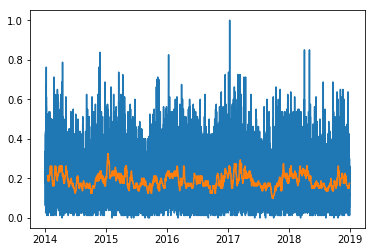

In [8]:
# Inspect trend of data
wind_ma_biweek = data['Wind Spd (km/h)'].rolling(window=24*14).median()
plt.plot(data.loc[:,'Wind Spd (km/h)'])
plt.plot(wind_ma_biweek)
plt.show()

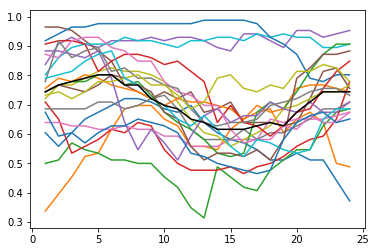

In [9]:
# Inspect seasonality of data
# Days (hourly measurements) per x weeks
weeks = 3
step = 24 #hours
periods = []
end = floor((7 * weeks * 24) / step)
for i in range(0,end):
    start = i * step
    stop = (i+1) * step
    periods.append(data.iloc[start:stop,4])
    plt.plot(np.arange(1,step+1), data.iloc[start:stop,4])
median = np.median(periods, axis=0)
plt.plot(np.arange(1,step+1), median, c='black')
plt.show()

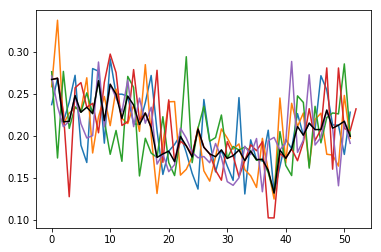

In [10]:
# Years (weekly means)
periods = []
data_weekly = data.resample('1W').mean()
for year in ['2014', '2015', '2016', '2017', '2018']:
    plt.plot(np.arange(0,data_weekly[year].shape[0]), data_weekly.loc[year, 'Wind Spd (km/h)'])
    periods.append(data_weekly.loc[year, 'Wind Spd (km/h)'].iloc[:52])
median = np.median(periods, axis=0)
plt.plot(median, c='black')
plt.show()

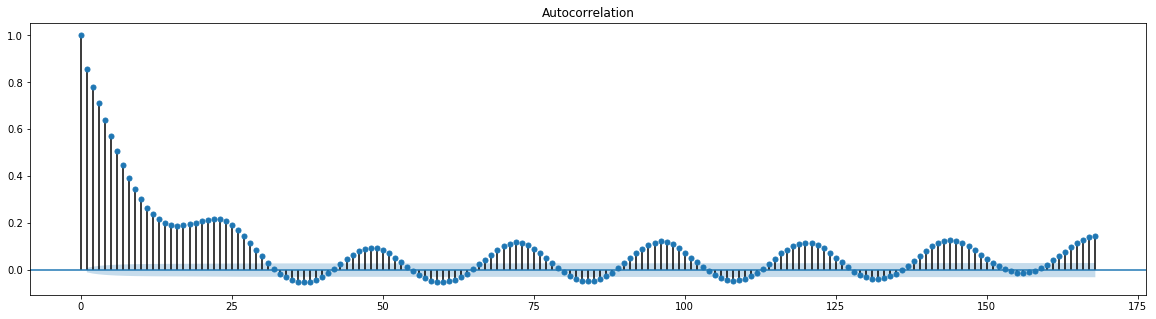

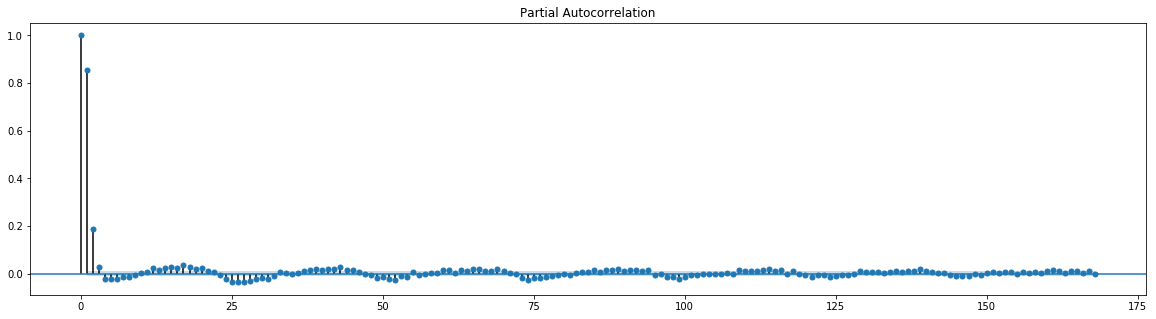

In [11]:
fix, ax = plt.subplots(figsize=(20,5))
plot_acf(data['Wind Spd (km/h)'], lags=24*7, unbiased=True, ax=ax)
plt.show()
fix, ax = plt.subplots(figsize=(20,5))
plot_pacf(data['Wind Spd (km/h)'], lags=24*7, ax=ax)
plt.show()

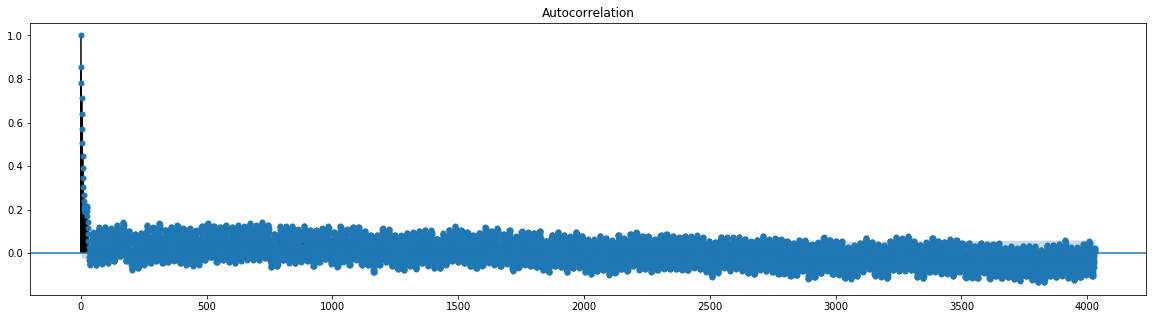

KeyboardInterrupt: 

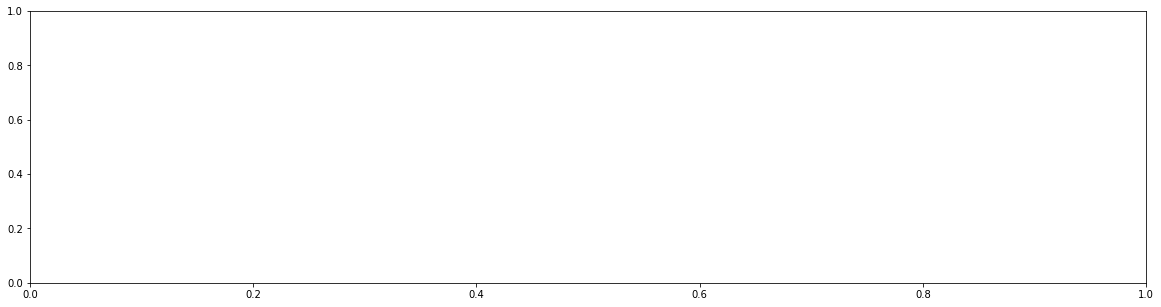

In [12]:
fix, ax = plt.subplots(figsize=(20,5))
plot_acf(data['Wind Spd (km/h)'], lags=24*7*4*6, unbiased=True, ax=ax)
plt.show()
fix, ax = plt.subplots(figsize=(20,5))
plot_pacf(data['Wind Spd (km/h)'], lags=24*7*4*6, ax=ax)
plt.show()